# Módulo 10 tarefa 2

Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Com o que você viu em aula, faça uma análise das variáveis qualitativas (posse de imóvel e posse de veículo) para verificar se são boas preditoras de *renda*. Alguma delas parece discriminar *renda* de forma estatisticamente significante?

In [1]:
# Importe de bibliotecas
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importando os dados
link = "https://raw.githubusercontent.com/gfsilveira/ebac/main/"
link += "03-Cientista%20de%20Dados/02-Crisp-DM/M%C3%B3dulo_10/"
link += "Profissao-%20Cientista%20de%20Dados_M10_support%20material.csv"

df = pd.read_csv(link)
df.drop(["Unnamed: 0","index"], axis=1, inplace=True)
df.head()

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,2015-01-01,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,2015-01-01,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2015-01-01,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,2015-01-01,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,2015-01-01,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


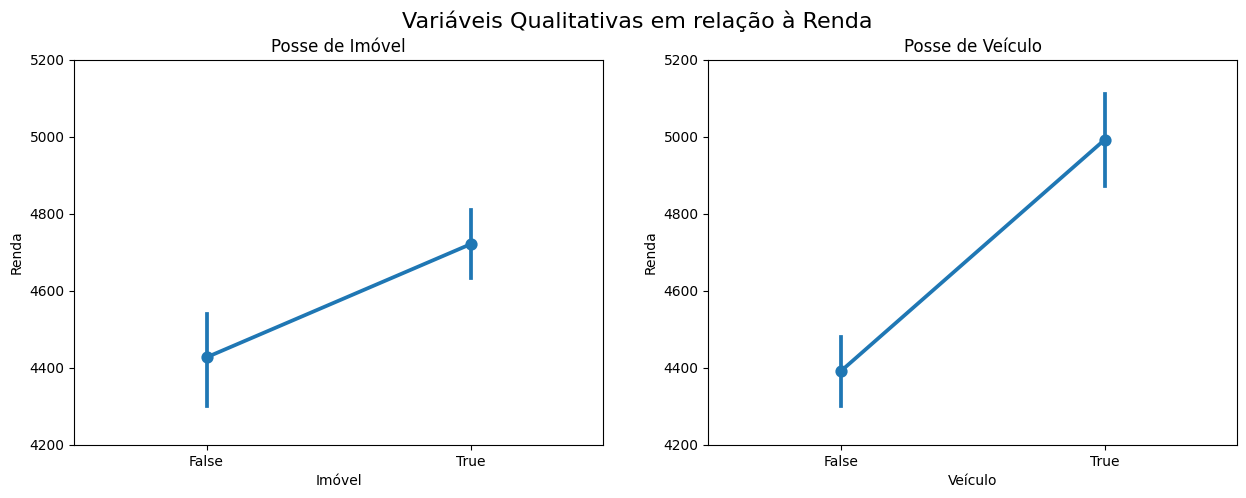

In [3]:
# Plot das variáveis qualitativas posse de imóvel e veículo.
figura, eixos = plt.subplots(1,2, figsize=(15,5))

plt.suptitle('Variáveis Qualitativas em relação à Renda', size=16)

ax = sns.pointplot(
    x="posse_de_imovel",
    y="renda",
    data=df,
    dodge=True,
    errorbar=('ci', 95),
    ax=eixos[0]
)
ax.set(
    title="Posse de Imóvel",
    xlabel="Imóvel",
    ylabel="Renda",
    ylim=(4_200,5_200)
)

ax = sns.pointplot(
    x="posse_de_veiculo",
    y="renda",
    data=df,
    dodge=True,
    errorbar=('ci', 95),
    ax=eixos[1]
)
ax.set(
    title="Posse de Veículo",
    xlabel="Veículo",
    ylabel="Renda",
    ylim=(4_200,5_200)
)

plt.show()

## Conclusão

- Clientes com maiores faixas de renda tendem a possuir veículo e imóvel, sendo o primeiro (veículo) melhor representativo das médias de renda.

- Na atividade anterior verificamos que a renda pode ser melhor explicada no formato Log, assim, repetimos a análise após a transformação

In [4]:
# Inserindo o log da renda na DataFrame
df_renda_log = df.copy()
df_renda_log['renda_log'] = np.log(df.renda)
df_renda_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   data_ref               15000 non-null  object 
 1   sexo                   15000 non-null  object 
 2   posse_de_veiculo       15000 non-null  bool   
 3   posse_de_imovel        15000 non-null  bool   
 4   qtd_filhos             15000 non-null  int64  
 5   tipo_renda             15000 non-null  object 
 6   educacao               15000 non-null  object 
 7   estado_civil           15000 non-null  object 
 8   tipo_residencia        15000 non-null  object 
 9   idade                  15000 non-null  int64  
 10  tempo_emprego          12466 non-null  float64
 11  qt_pessoas_residencia  15000 non-null  float64
 12  mau                    15000 non-null  bool   
 13  renda                  15000 non-null  float64
 14  renda_log              15000 non-null  float64
dtypes:

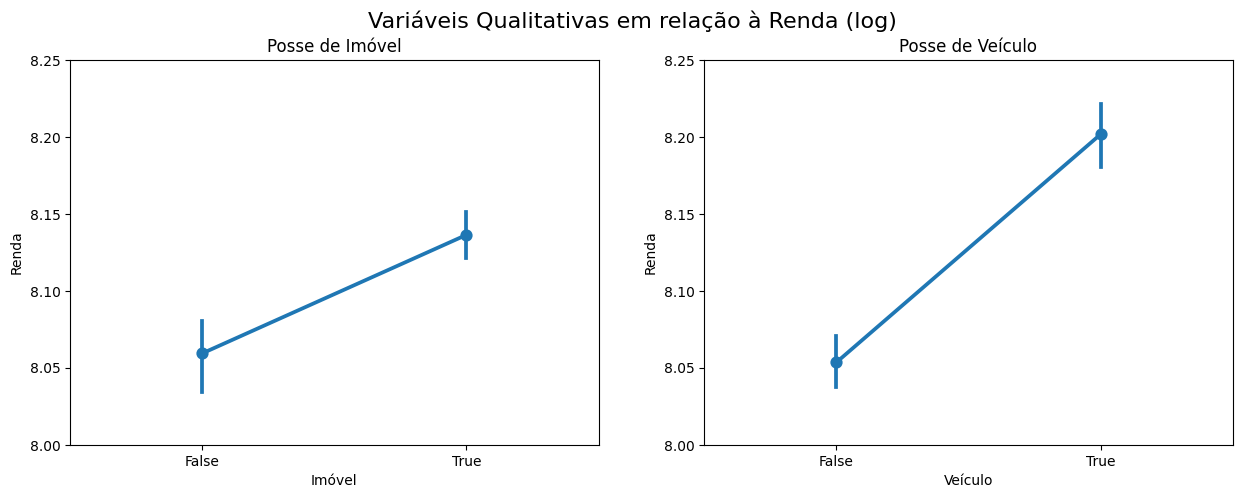

In [5]:
# Plot das variáveis qualitativas posse de imóvel e veículo.
figura, eixos = plt.subplots(1,2, figsize=(15,5))

plt.suptitle('Variáveis Qualitativas em relação à Renda (log)', size=16)

ax = sns.pointplot(
    x="posse_de_imovel",
    y="renda_log",
    data=df_renda_log,
    dodge=True,
    errorbar=('ci', 95),
    ax=eixos[0]
)
ax.set(
    title="Posse de Imóvel",
    xlabel="Imóvel",
    ylabel="Renda",
    ylim=(8,8.25)
)

ax = sns.pointplot(
    x="posse_de_veiculo",
    y="renda_log",
    data=df_renda_log,
    dodge=True,
    errorbar=('ci', 95),
    ax=eixos[1]
)
ax.set(
    title="Posse de Veículo",
    xlabel="Veículo",
    ylabel="Renda",
    ylim=(8,8.25)
)

plt.show()

## Conclusão

- A tendência observada na renda se mantem após a transformação.